In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the input data to have a single channel
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convert the labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

NameError: name 'mnist' is not defined

In [3]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

NameError: name 'plt' is not defined

In [4]:
def build_model():
    model = keras.Sequential(
        [
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    return model

model = build_model()

NameError: name 'keras' is not defined

In [ ]:
model_sgd = build_model()
model_sgd.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

# Compile the model with Adam optimizer
model_adam = build_model()
model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

# Compile the model with RMSprop optimizer
model_rmsprop = build_model()
model_rmsprop.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)

In [ ]:
# Train the models and record their accuracy and loss
history_sgd = model_sgd.fit(x_train, y_train, epochs=7, batch_size=64, validation_split=0.2)
history_adam = model_adam.fit(x_train, y_train, epochs=7, batch_size=64, validation_split=0.2)
history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=7, batch_size=64, validation_split=0.2)

# Evaluate the models on the test set
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test)
test_loss_adam, test_acc_adam = model_adam.evaluate(x_test, y_test)
test_loss_rmsprop, test_acc_rmsprop = model_rmsprop.evaluate(x_test, y_test)

# Print the test set accuracy for each optimizer
print('Test set accuracy for SGD optimizer:', test_acc_sgd)
print('Test set accuracy for Adam optimizer:', test_acc_adam)
print('Test set accuracy for RMSprop optimizer:', test_acc_rmsprop)

Epoch 1/7
750/750 [==============================] - 46s 60ms/step - loss: 0.9223 - accuracy: 0.7448 - val_loss: 0.2797 - val_accuracy: 0.9181
Epoch 2/7
750/750 [==============================] - 44s 59ms/step - loss: 0.2526 - accuracy: 0.9244 - val_loss: 0.1915 - val_accuracy: 0.9423
Epoch 3/7
750/750 [==============================] - 43s 57ms/step - loss: 0.1753 - accuracy: 0.9458 - val_loss: 0.1375 - val_accuracy: 0.9603
Epoch 4/7
750/750 [==============================] - 43s 57ms/step - loss: 0.1364 - accuracy: 0.9588 - val_loss: 0.1145 - val_accuracy: 0.9685
Epoch 5/7
750/750 [==============================] - 44s 59ms/step - loss: 0.1128 - accuracy: 0.9663 - val_loss: 0.1081 - val_accuracy: 0.9689
Epoch 6/7
750/750 [==============================] - 43s 57ms/step - loss: 0.0966 - accuracy: 0.9704 - val_loss: 0.1053 - val_accuracy: 0.9683
Epoch 7/7
750/750 [==============================] - 46s 61ms/step - loss: 0.0872 - accuracy: 0.9732 - val_loss: 0.0849 - val_accuracy: 0.9766

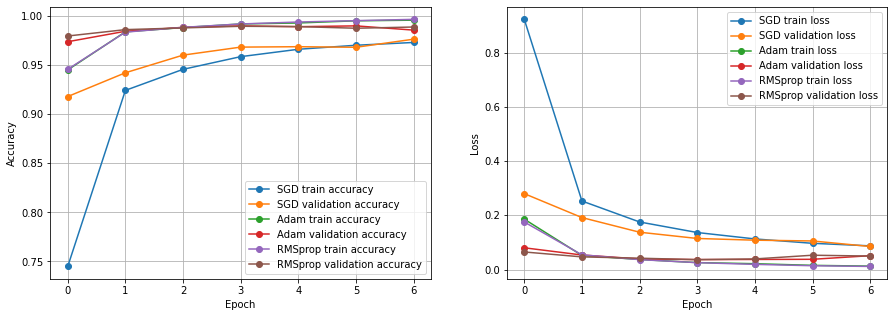

In [ ]:
plt.figure(figsize=(15,5))

# Plot the accuracy
plt.subplot(1,2,1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label = 'SGD validation accuracy')
plt.plot(history_adam.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(history_adam.history['val_accuracy'], 'o-', label = 'Adam validation accuracy')
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='RMSprop train accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label = 'RMSprop validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

# Plot the loss
plt.subplot(1,2,2)
plt.plot(history_sgd.history['loss'], 'o-', label='SGD train loss')
plt.plot(history_sgd.history['val_loss'], 'o-', label='SGD validation loss')
plt.plot(history_adam.history['loss'], 'o-', label='Adam train loss')
plt.plot(history_adam.history['val_loss'], 'o-', label='Adam validation loss')
plt.plot(history_rmsprop.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='RMSprop validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()